In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import warnings

In [84]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [53]:
data = pd.read_csv('TSLA.csv')

In [54]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
...,...,...,...,...,...,...,...
1254,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1255,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1256,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1257,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500


Assumption 1): Arimia is dependent on a linear combination based off of some time lag, in other words, the previous instances should result linear relationship with target. In this case we want to predict closing given past closing, so the target is **closing**. 

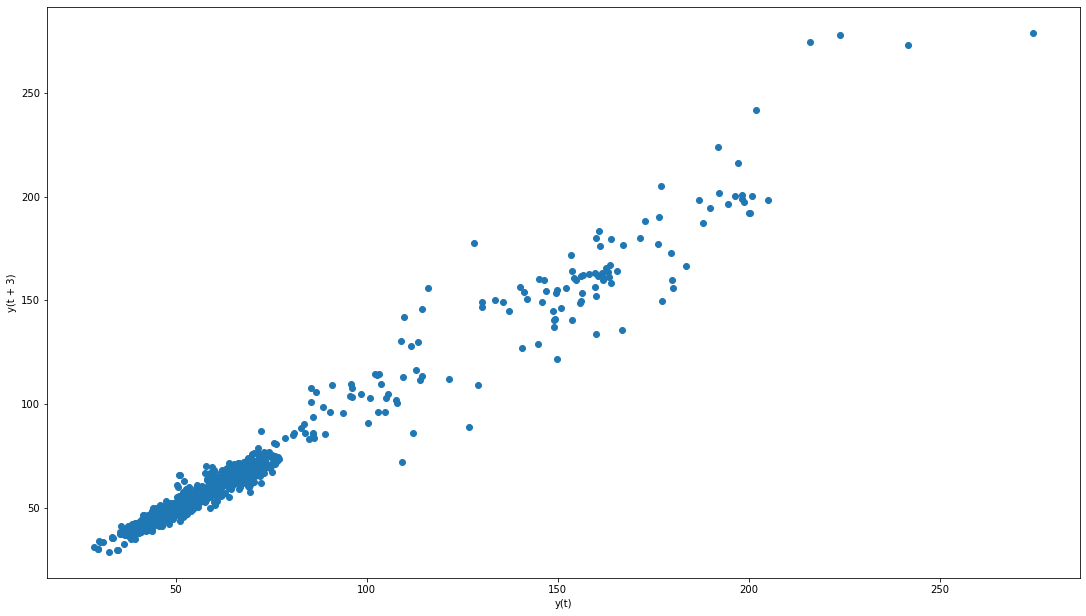

In [63]:
lag_plot(data['Close'], lag=3)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

**Notice** constant varaince suggests that with differencing we can get a stationary process, we can show this with some simple algebraic manipulation

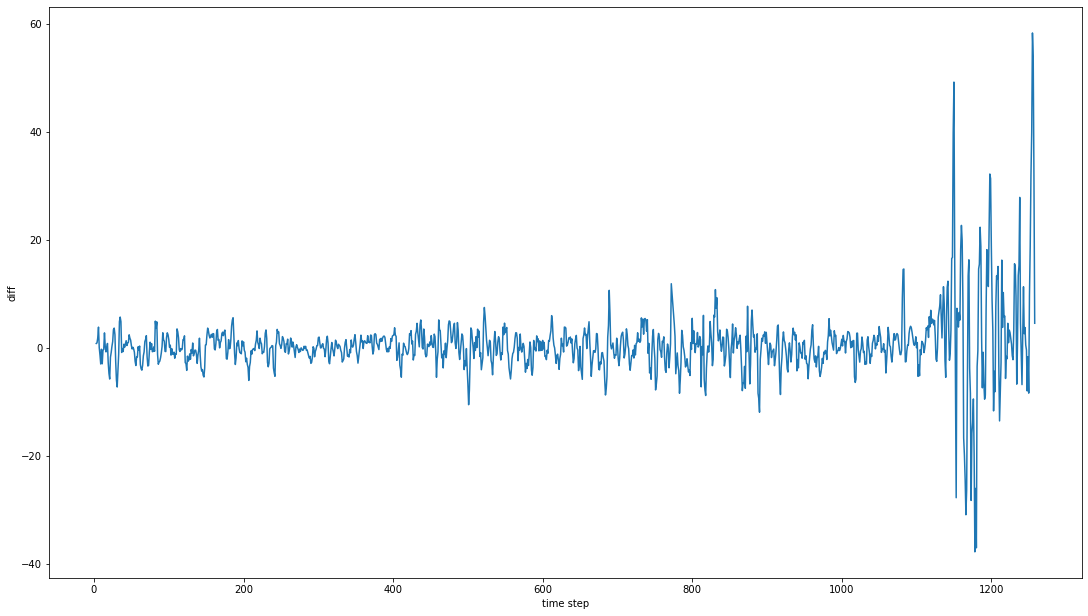

In [70]:
diff = data['Close'].diff(periods=3)
plt.xlabel('time step')
plt.ylabel('diff')
plt.plot(diff)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


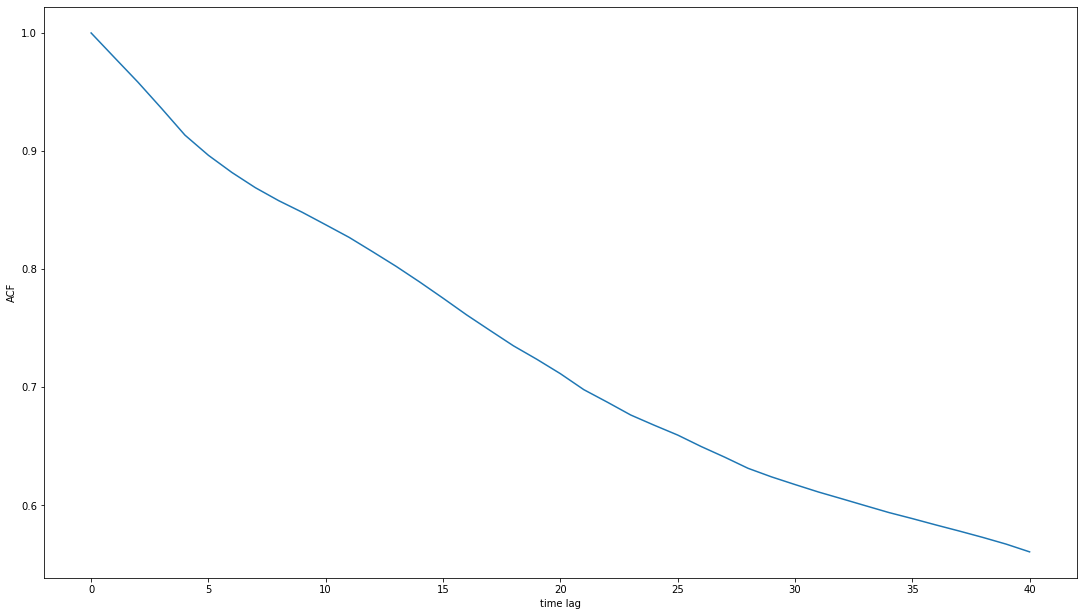

In [64]:
plt.xlabel('time lag')
plt.ylabel('ACF')
plt.title
plt.plot(acf(data['Close']))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

From the plots above, we can tell this is non-stationary process but can be converted to a (roughly) stationary process. To confirm the original is non-stationary we can show the original data

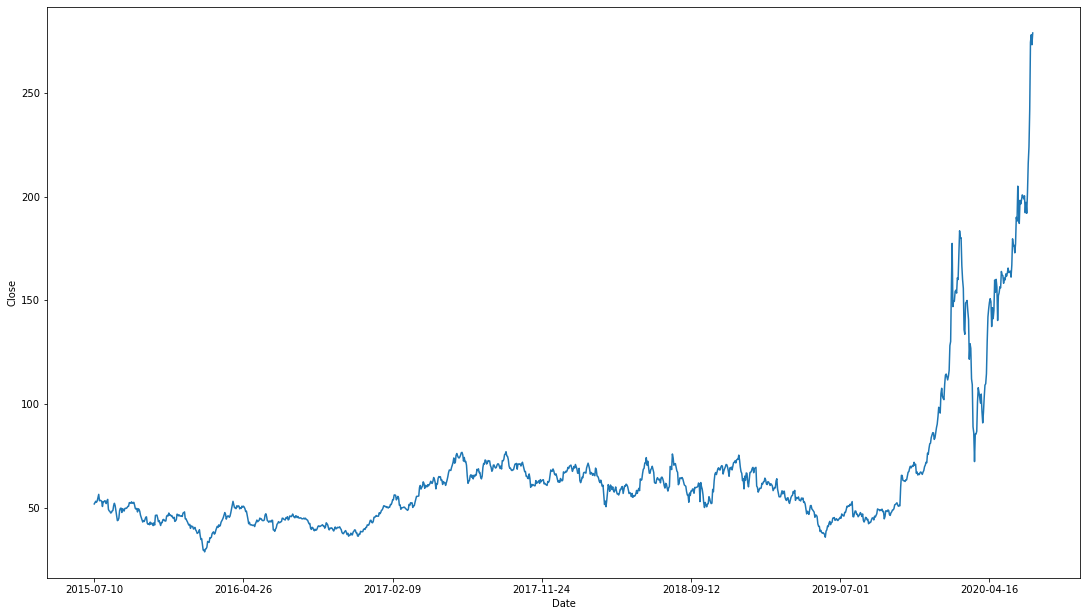

In [65]:
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(np.arange(0,1259,200), data['Date'][0:1259:200] )
plt.plot(data['Date'], data['Close'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

We are given a non-stationary process with differencing resulting in a stationary process. Furthermore the closing time at a given timestep can be modeled as a linear regression problem, which makes **ARIMA** a good choice for our modeling

In [72]:
train_data, test_data = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]

In [73]:
train_data = train_data['Close'].values
test_data = test_data['Close'].values

In [95]:
history = [x for x in train_data]
y_pred = [] #predictions 
for t in range(len(test_data)):
    model = ARIMA(history, order=(4,1,0)) #initial guesses on parameters
    model_fit = model.fit() #estimates parameters based off of training data
    output = model_fit.forecast() #default forecast 1-timestep ahead, (in-sample-pred, out-of-sample-pred)
    y_pred.append(output[0])
    history.append(test_data[t])
    
    

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [96]:
MSE_error = mean_squared_error(test_data, y_pred)

In [101]:
MSE_error

29.642382821023265

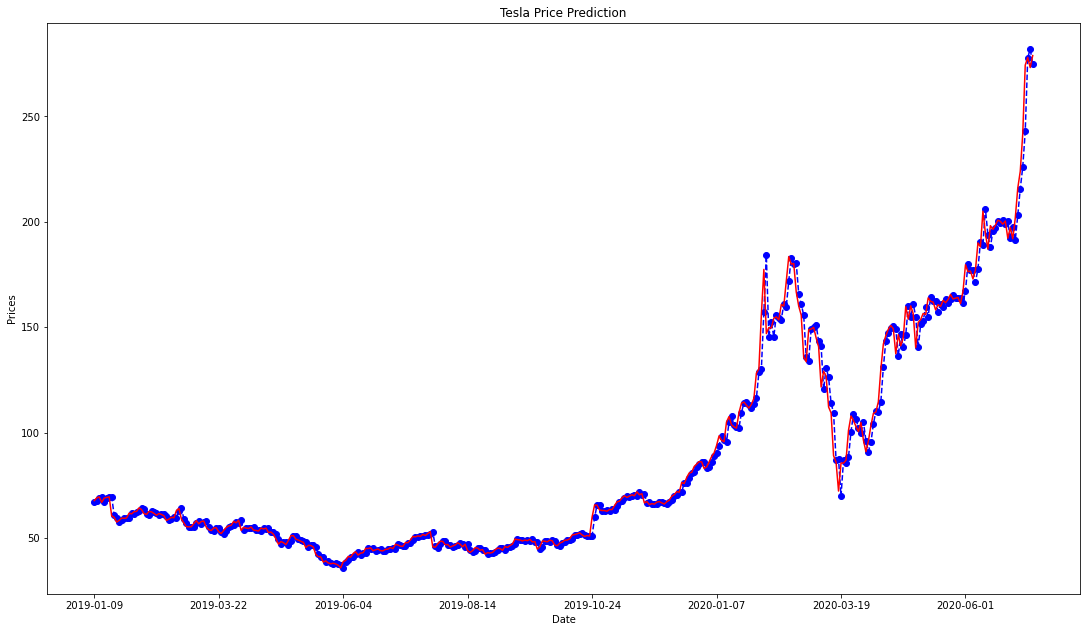

In [100]:
test_set_range = data[int(len(data)*0.7):].index
plt.plot(test_set_range, y_pred, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('Tesla Price Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), data['Date'][881:1259:50])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To su

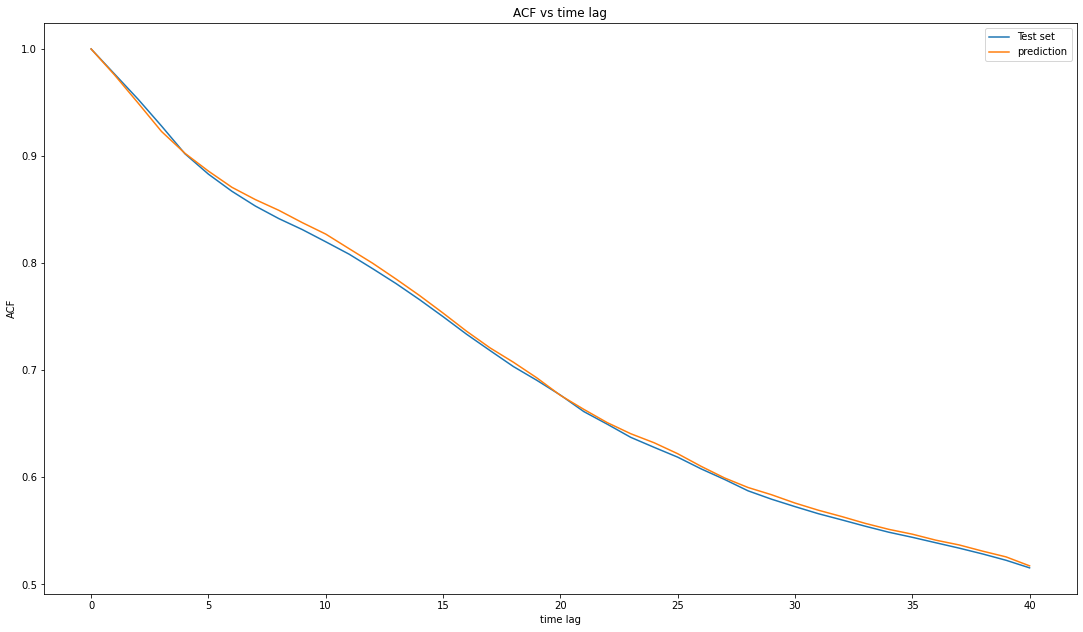

In [109]:
plt.xlabel('time lag')
plt.ylabel('ACF')
plt.title('ACF vs time lag')
plt.title
plt.plot(acf(test_data), label='Test set')
plt.plot(acf(y_pred), label = 'prediction')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

From the above plot we see that we fit the time series well. We also have a relatively low MSE given the context of the problem. Furthermore, we were successfuly able to model the linear relationships, which is shown in the autocorrelation graph. 